In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


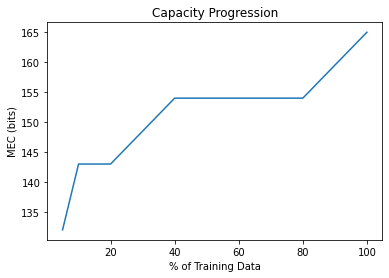

In [22]:
plt.plot([5, 10, 20, 40, 80, 100], np.asarray([12, 13, 13, 14, 14, 15]) * 11)
plt.title("Capacity Progression")
plt.xlabel("% of Training Data")
plt.ylabel("MEC (bits)");


In [4]:
data = pd.read_csv('log2.csv')
data.head()


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [23]:
X = data.loc[:, data.columns != 'Action']
y = data['Action']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
train_accuracy_list = []
val_accuracy_list = []

for hidden_size in range(1, 16):
  print("Now training + evaluating on hidden size", hidden_size)
  clf = MLPClassifier(hidden_layer_sizes=hidden_size, max_iter=500)
  clf.fit(X_train, y_train)
  print('Train Accuracy:', hidden_size,
        (clf.predict(X_train) == y_train).sum() / len(y_train))
  train_accuracy_list.append(
      (clf.predict(X_train) == y_train).sum() / len(y_train))
  val_accuracy_list.append((clf.predict(X_val) == y_val).sum() / len(y_val))
  print('Validation Accuracy:', hidden_size,
        (clf.predict(X_val) == y_val).sum() / len(y_val))


Now training + evaluating on hidden size 1
Train Accuracy: 1 0.5742870767763472
Validation Accuracy: 1 0.5774013885709925
Now training + evaluating on hidden size 2
Train Accuracy: 2 0.573657606103958
Validation Accuracy: 2 0.5772487983520256
Now training + evaluating on hidden size 3
Train Accuracy: 3 0.7913400095374344
Validation Accuracy: 3 0.7901884489204242
Now training + evaluating on hidden size 4
Train Accuracy: 4 0.9821077730090606
Validation Accuracy: 4 0.9830624856946669
Now training + evaluating on hidden size 5
Train Accuracy: 5 0.7945255126371006
Validation Accuracy: 5 0.7994964522774091
Now training + evaluating on hidden size 6
Train Accuracy: 6 0.9792465426800191
Validation Accuracy: 6 0.9809262226291294
Now training + evaluating on hidden size 7
Train Accuracy: 7 0.9977491654744873
Validation Accuracy: 7 0.9977111467154955
Now training + evaluating on hidden size 8
Train Accuracy: 8 0.9801049117787315
Validation Accuracy: 8 0.9816128786144808
Now training + evaluating

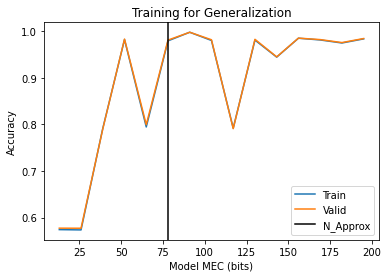

In [25]:
plt.plot(list(range(13, 13*16, 13)), train_accuracy_list, label="Train")
plt.plot(list(range(13, 13*16, 13)), val_accuracy_list, label="Valid")
plt.axvline(x=6*13, color='black', label="N_Approx")
plt.legend()
plt.xlabel("Model MEC (bits)")
plt.ylabel("Accuracy")
plt.title("Training for Generalization");


In [30]:
clf = MLPClassifier(hidden_layer_sizes=6, max_iter=500)
clf.fit(X_train, y_train)
num_correct = (clf.predict(X_train) == y_train).sum()
acc = num_correct / len(y_train)
print("The training accuracy after choosing the hidden layer size is", acc)
print("The generalization after choosing the hidden layer size is",
      num_correct / (13*6))


The training accuracy after choosing the hidden layer size is 0.9847210300429184
The generalization after choosing the hidden layer size is 661.8461538461538


In [31]:
clf = MLPClassifier(hidden_layer_sizes=6, max_iter=500)
clf.fit(X_train, y_train)

num_correct = (clf.predict(X_val) == y_val).sum()
acc = num_correct / len(y_val)
print("The test accuracy after choosing the hidden layer size is " + str(acc))
print("The generalization after choosing the hidden layer size is",
      num_correct / (13*6))


The test accuracy after choosing the hidden layer size is 0.9859616998550393
The generalization after choosing the hidden layer size is 165.67948717948718
